In [59]:
from regraph import NXGraph, Rule
from regraph import plot_graph, plot_instance, plot_rule

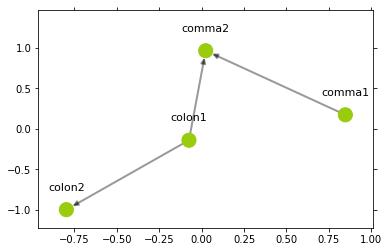

In [71]:
graph = NXGraph()
graph.add_nodes_from(
    [
        ('comma1', {'type': {','}}),
        ('comma2', {'type': {','}}),
        ('colon1', {'type': {':'}}),
        ('colon2', {'type': {':'}})
    ]
)
graph.add_edge('colon1', 'colon2')
graph.add_edge('comma1', 'comma2')
graph.add_edge('colon1', 'comma2')

positioning = plot_graph(graph)

In [72]:
def create_simple_pattern(attr_name, node_type):
    pattern = NXGraph()
    pattern.add_node(attr_name)
    pattern.add_node_attrs(attr_name, {"type": node_type})
    return pattern


pattern = create_simple_pattern(':' , ':')
instances = graph.find_matching(pattern)
print(instances)

[{':': 'colon1'}, {':': 'colon2'}]


In [73]:
rule = Rule.from_transform(pattern)
#plot_rule(rule)
rule.inject_remove_node(':')
#plot_rule(rule)
print(instances)

[{':': 'colon1'}, {':': 'colon2'}]


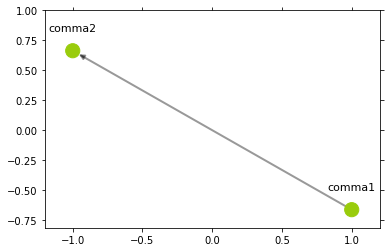

In [74]:
for instance in instances:
    rhs_graph = graph.rewrite(rule, instance)
pos = plot_graph(graph)